In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

price = pd.read_csv("Datasets/Phase 0 - Price.csv", na_values=np.nan)
price["Value"] = "Price"
price = price.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read sales data
sales = pd.read_csv("Datasets/Phase 0 - Sales.csv", na_values=np.nan)
sales["Value"] = "Sales"
sales = sales.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read price validation data
price_test = pd.read_csv("Datasets/Phase 1 - Price.csv", na_values=np.nan)
price_test["Value"] = "Price"
price_test = price_test.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read sales validation data
sales_test = pd.read_csv("Datasets/Phase 1 - Sales.csv", na_values=np.nan)
sales_test["Value"] = "Sales"
sales_test = sales_test.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Create single dataframe
df = pd.concat([price, sales]).unstack("Value").reset_index()
df.columns = ["Client", "Warehouse", "Product", "ds", "Price", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df = df.astype({"Price": np.float32,
                "y": np.float32,
                "Client": "category",
                "Warehouse": "category",
                "Product": "category",
                })

df_test = pd.concat([price_test, sales_test]).unstack("Value").reset_index()
df_test.columns = ["Client", "Warehouse", "Product", "ds", "Price", "y"]
df_test["ds"] = pd.to_datetime(df_test["ds"])
df_test = df_test.astype({"Price": np.float32,
                "y": np.float32,
                "Client": "category",
                "Warehouse": "category",
                "Product": "category",
                })

In [5]:
display(df.head())
display(df_test.head())

,Client,Warehouse,Product,ds,Price,y
0,0,1,367,2020-07-06,10.900001,7.0
1,0,1,367,2020-07-13,10.900001,7.0
2,0,1,367,2020-07-20,10.900001,7.0
3,0,1,367,2020-07-27,15.582857,7.0
4,0,1,367,2020-08-03,27.289999,7.0


,Client,Warehouse,Product,ds,Price,y
0,0,1,367,2023-10-09,51.860001,1.0
1,0,1,367,2023-10-16,51.860001,1.0
2,0,1,367,2023-10-23,51.860001,1.0
3,0,1,367,2023-10-30,51.230000,2.0
4,0,1,367,2023-11-06,51.230000,1.0


In [6]:
df.describe()

,ds,Price,y
count,2559010,722573.000000,2.559010e+06
mean,2022-02-17 12:00:00.000000256,76.209610,1.268372e+01
min,2020-07-06 00:00:00,0.000000,0.000000e+00
25%,2021-04-26 00:00:00,17.730000,0.000000e+00
50%,2022-02-17 12:00:00,27.990000,0.000000e+00
75%,2022-12-12 00:00:00,51.189999,1.000000e+00
max,2023-10-02 00:00:00,10000.000000,1.368100e+04
std,NaN,228.967102,1.011854e+02


In [7]:
df_test.describe()

,ds,Price,y
count,195689,85630.000000,195689.000000
mean,2023-11-20 00:00:00,63.426662,19.959251
min,2023-10-09 00:00:00,0.000000,0.000000
25%,2023-10-30 00:00:00,17.969999,0.000000
50%,2023-11-20 00:00:00,28.000000,0.000000
75%,2023-12-11 00:00:00,48.270000,5.000000
max,2024-01-01 00:00:00,5916.040039,15236.000000
std,NaN,210.477951,128.984299


In [8]:
display(df.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559010 entries, 0 to 2559009
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Client     category      
 1   Warehouse  category      
 2   Product    category      
 3   ds         datetime64[ns]
 4   Price      float32       
 5   y          float32       
dtypes: category(3), datetime64[ns](1), float32(2)
memory usage: 51.6 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195689 entries, 0 to 195688
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Client     195689 non-null  category      
 1   Warehouse  195689 non-null  category      
 2   Product    195689 non-null  category      
 3   ds         195689 non-null  datetime64[ns]
 4   Price      85630 non-null   float32       
 5   y          195689 non-null  float32       
dtypes: category(3), datetime64[ns](1), float32(2)
memory usage: 4.3 MB


None

In [30]:
sns.histplot(df['y'], kde=True)
plt.title('Distribution of Target Variable (y)')
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10782da10>>
Traceback (most recent call last):
  File "/Users/sathyanarayanan/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


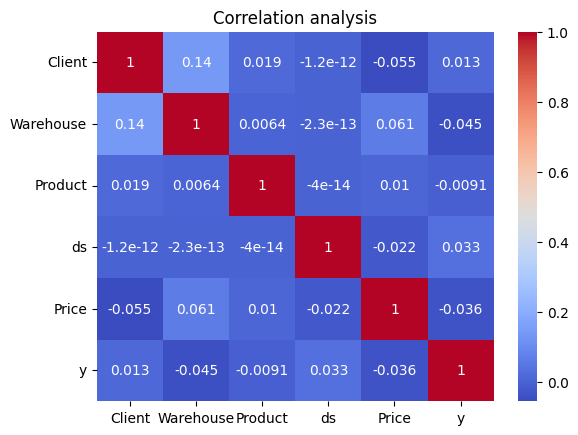

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation analysis')
plt.show()


In [14]:
# Group by Client, Warehouse, and Product to check the average y value
print(df.groupby('Client')['y'].mean())
print(df.groupby('Warehouse')['y'].mean())
print(df.groupby('Product')['y'].mean())

Client
0      53.260773
1       2.006233
2      14.187347
3      35.728809
4       0.641470
5      14.384107
6      18.985317
7       0.152227
8       0.888522
9       0.006814
10      1.032820
12      0.630872
13      3.798897
14      1.741338
15     19.836802
16     11.571589
17      0.236143
18      8.641549
19      0.120770
20      0.207231
21     27.783222
22     13.391485
23      4.221488
24     10.912339
25      0.218860
26     15.425847
27      6.204569
28      3.825669
29      0.126495
30      4.088978
31      1.879134
32     15.956768
33     51.195957
34      0.516579
35      0.470000
36     20.861345
37     11.184706
38    159.211502
39      0.201961
40      2.221062
41     33.578613
42     29.180695
43     14.617157
44     10.457343
45      4.139869
46      7.670840
Name: y, dtype: float32
Warehouse
0        3.201681
1        6.401821
2      913.004395
3      260.861877
4        0.947712
          ...    
334      8.312745
335      1.052941
336      4.158432
337      0.5611

/var/folders/qw/_pbg8b9n1n3cmd0kdk_xy44m0000gn/T/ipykernel_98964/1419155803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Client')['y'].mean())
/var/folders/qw/_pbg8b9n1n3cmd0kdk_xy44m0000gn/T/ipykernel_98964/1419155803.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Warehouse')['y'].mean())
/var/folders/qw/_pbg8b9n1n3cmd0kdk_xy44m0000gn/T/ipykernel_98964/1419155803.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the 

In [17]:
# Group by Product and sum the 'y' values to find top five products
top_products = df.groupby('Product')['y'].sum().nlargest(5).index

print("Top five products:", top_products)


Top five products: CategoricalIndex([2866, 8986, 4902, 1222, 9410], categories=[0, 1, 2, 3, ..., 14319, 14320, 14322, 14323], ordered=False, dtype='category', name='Product')


/var/folders/qw/_pbg8b9n1n3cmd0kdk_xy44m0000gn/T/ipykernel_98964/3498233954.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product')['y'].sum().nlargest(5).index


In [18]:
# Filter the DataFrame for the top five products
top_products_df = df[df['Product'].isin(top_products)]


In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a Plotly figure
fig = go.Figure()

# Plot Sales (y) over time for the top products
for product in top_products:
    product_df = top_products_df[top_products_df['Product'] == product]
    
    # Plot sales for the product
    fig.add_trace(go.Scatter(
        x=product_df['ds'], 
        y=product_df['y'], 
        mode='lines',
        name=f'{product} Sales',
        hovertemplate='Date: %{x}<br>Sales: %{y}'
    ))
    
    # Plot price for the product, initially hidden
    fig.add_trace(go.Scatter(
        x=product_df['ds'], 
        y=product_df['Price'], 
        mode='lines',
        name=f'{product} Price',
        visible='legendonly',  # Initially hide the price
        line=dict(dash='dash'),
        hovertemplate='Date: %{x}<br>Price: %{y}'
    ))

# Update layout
fig.update_layout(
    title='Sales and Price over Time for Top 5 Products',
    xaxis_title='Time',
    yaxis_title='Sales',
    hovermode='x unified',
    legend_title='Legend',
    template='plotly_white',
    height=600
)

# Show the plot
fig.show()


In [16]:
df['year'] = df['ds'].dt.year
df['month'] = df['ds'].dt.month
df['day_of_week'] = df['ds'].dt.dayofweek